In [0]:
import pandas as pd
import matplotlib.pyplot as plt
path_to_file = "../data/Selfie-dataset/selfie_dataset.txt"
data = pd.read_csv(path_to_file,sep=" ",header=None,encoding='utf-8')
data.columns = ["image_name","popularity_score","partial_faces","is_female","baby","child","teenager","youth","middle_age","senior","white","black","asian","oval_face","round_face","heart_face","smiling","mouth_open","frowning","wearing_glasses","wearing_sunglasses","wearing_lipstick","tongue_out","duck_face","black_hair","blond_hair","brown_hair","red_hair","curly_hair","straight_hair","braid_hair","showing_cellphone","using_earphone","using_mirror","braces","wearing_hat","harsh_lighting","dim_lighting"]
head = data.head(10)
tail = data.tail(10)
head
tail

df = pd.DataFrame(data, columns=["image_name","popularity_score","partial_faces","is_female","baby","child","teenager","youth","middle_age","senior","white","black","asian","oval_face","round_face","heart_face","smiling","mouth_open","frowning","wearing_glasses","wearing_sunglasses","wearing_lipstick","tongue_out","duck_face","black_hair","blond_hair","brown_hair","red_hair","curly_hair","straight_hair","braid_hair","showing_cellphone","using_earphone","using_mirror","braces","wearing_hat","harsh_lighting","dim_lighting"])
print(df.shape)
df_updated = pd.DataFrame()
limit = 1000

# df_updated = df_updated.append(df[df.is_female == 1][:limit])
# # df.drop(df.index[df.is_female == 1].tolist())
# print(df.shape)
# print(df_updated.shape)

# babies_to_write = []


# # df_updated = df_updated.append(df[df.baby == -1][:limit])
# # df.drop(df.index[df.baby ==-1].tolist())
# df_updated = df_updated.append(df[df.baby== 1][:limit])
# df.drop(df.index[df.baby == 1].tolist())


# print(df_updated.shape)


# # df_updated = df_updated.append(df[df.child == -1][:limit])
# # df.drop(df.index[df.child ==-1].tolist())
# df_updated = df_updated.append(df[df.child== 1][:limit])
# df.drop(df.index[df.child == 1].tolist())


# print(df_updated.shape)

# # df_updated = df_updated.append(df[df.teenager == -1][:limit])
# # df.drop(df.index[df.teenager ==-1].tolist())
# df_updated = df_updated.append(df[df.teenager== 1][:limit])
# df.drop(df.index[df.teenager == 1].tolist())


# print(df_updated.shape)


# # df_updated = df_updated.append(df[df.youth == -1][:limit])
# # df.drop(df.index[df.youth ==-1].tolist())
# df_updated = df_updated.append(df[df.youth== 1][:limit])
# df.drop(df.index[df.youth == 1].tolist())


# print(df_updated.shape)

# # df_updated = df_updated.append(df[df.middle_age == -1][:limit])
# # df.drop(df.index[df.middle_age ==-1].tolist())
# df_updated = df_updated.append(df[df.middle_age== 1][:limit])
# df.drop(df.index[df.middle_age == 1].tolist())


# print(df_updated.shape)

# # df_updated = df_updated.append(df[df.senior == -1][:limit])
# # df.drop(df.index[df.senior ==-1].tolist())
# df_updated = df_updated.append(df[df.senior== 1][:limit])
# df.drop(df.index[df.senior == 1].tolist())
# print()


(46836, 38)


In [0]:
df.iloc[:,1:]

for x in df.iloc[:,1:]:

    data=data.replace({x: {-1: 0}})
df = data
        


In [0]:
df = df.iloc[:,1:]


In [0]:
def label_race (row):
    if row['popularity_score'] >4.642 :
        return 'Good' 
    if row['popularity_score'] <4.138 :
        return 'Bad'
    else:
        return 'Average'

In [0]:
df['label'] = df.apply (lambda row: label_race (row),axis=1)

In [0]:
df.head()

,popularity_score,partial_faces,is_female,baby,child,teenager,youth,middle_age,senior,white,...,straight_hair,braid_hair,showing_cellphone,using_earphone,using_mirror,braces,wearing_hat,harsh_lighting,dim_lighting,label
0,3.901,1,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,Bad
1,4.385,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Average
2,4.243,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,Average
3,4.169,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Average
4,3.873,0,1,0,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,Bad


In [0]:
pd.qcut(df.popularity_score,3).value_counts()


(1.655, 4.133]    15636
(4.628, 6.714]    15603
(4.133, 4.628]    15597
Name: popularity_score, dtype: int64

In [0]:
array = df.values

print(array.shape)
X = array[:,1:-1]
Y = array[:,-1]



print(X.shape)
print(Y)

(46836, 38)
(46836, 36)
['Bad' 'Average' 'Average' ... 'Bad' 'Good' 'Good']


In [0]:
# Import the necessary libraries first
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import numpy as np

In [0]:
# Feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)

# Summarize scores
np.set_printoptions(precision=3)
print(np.argmax(fit.scores_))

print(fit.scores_)

features = fit.transform(X)
# Summarize selected features
#print(features[0:5,:])
#features.shape
#features

1
[ 80.753 135.784  24.783  16.824   3.667  28.082  13.593   1.704   8.412
  41.937  62.188  20.97    0.525   3.533  92.927   1.166  10.576   3.185
  48.494 124.354   0.387   9.581   5.25   48.512  26.337  20.686  82.833
 106.607   3.919  13.415   2.393  15.51   22.427   4.333  35.139  35.139]


TypeError: show() got an unexpected keyword argument 'fig_size'

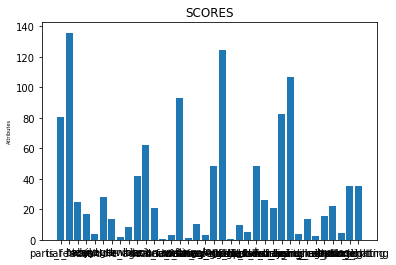

In [0]:
#df = pd.DataFrame({'attributes':['is_female', 'baby', 'child','teenager','youth'], 'val':[is_female.is_female, baby.baby, child.child, teenager.teenager, youth.youth]})

attributes = ["partial_faces","is_female","baby","child","teenager","youth","middle_age","senior","white","black","asian","oval_face","round_face","heart_face","smiling","mouth_open","frowning","wearing_glasses","wearing_sunglasses","wearing_lipstick","tongue_out","duck_face","black_hair","blond_hair","brown_hair","red_hair","curly_hair","straight_hair","braid_hair","showing_cellphone","using_earphone","using_mirror","braces","wearing_hat","harsh_lighting","dim_lighting"]

plt.bar(attributes,fit.scores_)
plt.ylabel('Attributes', fontsize=5)
plt.xticks
plt.title('SCORES')
plt.show(fig_size=(15,15))
plt.savefig('augment_b.png')
print(len(attributes))

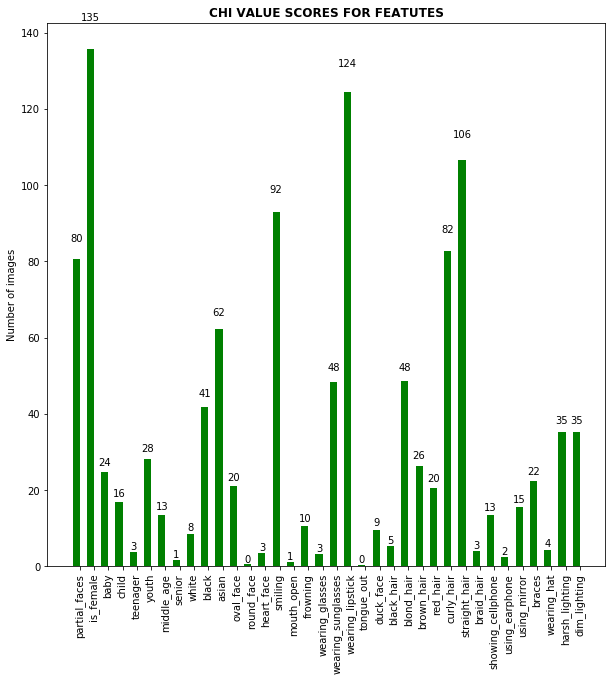

In [0]:

import numpy as np
N = 36
ind = np.arange(N)
width = 0.5
fig, ax = plt.subplots(figsize=(10,10))
rects1 = ax.bar(ind, fit.scores_, width, color='g',align='center')
ax.set_ylabel('Number of images')
ax.set_title('CHI VALUE SCORES FOR FEATUTES',fontweight="bold")
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(attributes,rotation=90)
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')
autolabel(rects1)



plt.show()


In [0]:
attributes = ["partial_faces","is_female","baby","child","teenager","youth","middle_age","senior","white","black","asian","oval_face","round_face","heart_face","smiling","mouth_open","frowning","wearing_glasses","wearing_sunglasses","wearing_lipstick","tongue_out","duck_face","black_hair","blond_hair","brown_hair","red_hair","curly_hair","straight_hair","braid_hair","showing_cellphone","using_earphone","using_mirror","braces","wearing_hat","harsh_lighting","dim_lighting"]

fit.scores_

dicts = {}
for x,y in zip(attributes,fit.scores_):
    dicts[x] = y
dicts

sorted_by_value = sorted(dicts.items(), key=lambda kv: kv[1])
print("The top attributes are : ",sorted_by_value[-4:])


The top attributes are :  [('smiling', 92.92656260454172), ('straight_hair', 106.60675590709525), ('wearing_lipstick', 124.35392335572422), ('is_female', 135.78389756318245)]


In [0]:
df = df[(df['popularity_score']>4.628)]

In [0]:
for c in df.columns[2:]:
    print(c)
    print(df[c].value_counts())

partial_faces
-1    12706
 1     2897
Name: partial_faces, dtype: int64
is_female
 1    12095
-1     3024
 0      484
Name: is_female, dtype: int64
baby
-1    15568
 1       35
Name: baby, dtype: int64
child
-1    15393
 1      210
Name: child, dtype: int64
teenager
-1    13575
 1     2028
Name: teenager, dtype: int64
youth
 1    10965
-1     4638
Name: youth, dtype: int64
middle_age
-1    15278
 1      325
Name: middle_age, dtype: int64
senior
-1    15597
 1        6
Name: senior, dtype: int64
white
 1    8795
-1    6808
Name: white, dtype: int64
black
-1    14955
 1      648
Name: black, dtype: int64
asian
-1    14354
 1     1249
Name: asian, dtype: int64
oval_face
 1    9236
-1    6367
Name: oval_face, dtype: int64
round_face
-1    13551
 1     2052
Name: round_face, dtype: int64
heart_face
-1    13738
 1     1865
Name: heart_face, dtype: int64
smiling
-1    11067
 1     4536
Name: smiling, dtype: int64
mouth_open
-1    15021
 1      582
Name: mouth_open, dtype: int64
frowning
-1   

In [0]:
sum_array = {}
for column in df:
    sum_array[column] = (df[df[column]==1][column].sum())

In [0]:
sum_array

In [0]:
sum_array

In [0]:
df=df_updated
df.shape

In [0]:

is_female = df[df.is_female == 1].sum()
isnot_female = df[df.is_female == -1].sum()


baby = df[df.baby == 1].sum()
notbaby = df[df.baby == -1].sum()


teenager = df[df.teenager == 1].sum()
notteenager = df[df.teenager == -1].sum()

child = df[df.child == 1].sum()
notchild = df[df.child == -1].sum()

youth = df[df.youth == 1].sum()
notyouth = df[df.youth == -1].sum()

middle_age = df[df.middle_age == 1].sum()
notmiddle_age = df[df.middle_age == -1].sum()

senior = df[df.senior == 1].sum()
notsenior = df[df.senior == -1].sum()

In [0]:
df.boxplot(column=['popularity_score','straight_hair'])

In [0]:
#df = pd.DataFrame({'attributes':['is_female', 'baby', 'child','teenager','youth'], 'val':[is_female.is_female, baby.baby, child.child, teenager.teenager, youth.youth]})

attributes = ['is_female', 'baby', 'child','teenager','youth','middle_age','senior']
val = [is_female.is_female, baby.baby, child.child, teenager.teenager, youth.youth,middle_age.middle_age,senior.senior]
plt.bar(attributes,val)
plt.ylabel('No of Images', fontsize=5)
plt.xticks
plt.title('IMAGES ON SELFIE DATASET')
plt.show()
plt.savefig('augment_b.png')


In [0]:

import numpy as np
N = 7
ind = np.arange(N)
width = 0.5
fig, ax = plt.subplots(figsize=(10,10))
valfalse = [-isnot_female.is_female,-notbaby.baby,-notchild.child,-notteenager.teenager,-notyouth.youth,-notmiddle_age.middle_age,-notsenior.senior]
rects1 = ax.bar(ind, val, width, color='g',align='center')
rects2 = ax.bar(ind + width, valfalse, width, color='r',align='center')
ax.set_ylabel('Number of images')
ax.set_title('Distribution of Augmented Samples',fontweight="bold")
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(attributes)
ax.legend((rects1[0], rects2[0]), ('Images containing attribute', 'Images not containing attribute'))
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)




plt.show()


In [0]:
import numpy as np
N = 7
ind = np.arange(N)
width = 0.5
fig, ax = plt.subplots(figsize=(10,10))
valfalse = [-isnot_female.is_female,-notbaby.baby,-notchild.child,-notteenager.teenager,-notyouth.youth,-notmiddle_age.middle_age,-notsenior.senior]
rects1 = ax.bar(ind, val, width, color='g',align='center')
rects2 = ax.bar(ind + width, valfalse, width, color='r',align='center')
ax.set_ylabel('Number of images')
ax.set_title('Distribution of Original Samples',fontweight="bold")
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(attributes)
ax.legend((rects1[0], rects2[0]), ('Images containing attribute', 'Images not containing attribute'))
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
plt.show()
ply.savefig("aug_bar.png")

In [0]:
import numpy as np
N = 7
ind = np.arange(N)
width = 0.5
fig, ax = plt.subplots(figsize=(10,10))
valfalse = [-isnot_female.is_female,-notbaby.baby,-notchild.child,-notteenager.teenager,-notyouth.youth,-notmiddle_age.middle_age,-notsenior.senior]
rects1 = ax.bar(ind, val, width, color='g',align='center')
rects2 = ax.bar(ind + width, valfalse, width, color='r',align='center')
ax.set_ylabel('Number of images')
ax.set_title('Distribution of Original Samples',fontweight="bold")
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(attributes)
ax.legend((rects1[0], rects2[0]), ('Images containing attribute', 'Images not containing attribute'))
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
plt.show()

In [0]:
images_to_write=[]
for i in range(df_updated.shape[0]):
    images_to_write.append(list(df_updated.iloc[i][:]))
    images_to_write[i] = [str(j) for j in images_to_write[i]]

In [0]:
len(images_to_write)

0

In [0]:
babies_to_write=[]
for i in range(df_updated[df_updated.baby == 1].shape[0]):
    babies_to_write.append(list(df_updated[df_updated.baby == 1].iloc[i][:]))
    babies_to_write[i] = [str(j) for j in babies_to_write[i]]

In [0]:
child_to_write=[]
for i in range(df_updated[df_updated.child == 1].shape[0]):
    child_to_write.append(list(df_updated[df_updated.child == 1].iloc[i][:]))
    child_to_write[i] = [str(j) for j in child_to_write[i]]

In [0]:
middle_to_write=[]
for i in range(df_updated[df_updated.middle_age == 1].shape[0]):
    middle_to_write.append(list(df_updated[df_updated.middle_age == 1].iloc[i][:]))
    middle_to_write[i] = [str(j) for j in middle_to_write[i]]

In [0]:
seniors_to_write=[]
for i in range(df_updated[df_updated.senior == 1].shape[0]):
    seniors_to_write.append(list(df_updated[df_updated.senior == 1].iloc[i][:]))
    seniors_to_write[i] = [str(j) for j in seniors_to_write[i]]

In [0]:
data_dir=[]
for i in range(len(child_to_write)):
    augment(child_to_write[i][0],data_dir,child_to_write[i],2)

In [0]:
data_dir=[]
for i in range(len(babies_to_write)):
    augment(babies_to_write[i][0],data_dir,babies_to_write[i],3)

In [0]:
data_dir=[]
for i in range(len(middle_to_write)):
    augment(middle_to_write[i][0],data_dir,middle_to_write[i],1)

In [0]:
data_dir=[]
for i in range(len(seniors_to_write)):
    augment(seniors_to_write[i][0],data_dir,seniors_to_write[i],15)

In [0]:
type(child_to_write)

In [0]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img


In [0]:
import time
import os
import glob
from PIL import Image,ImageOps
import numpy as np

In [0]:
def  get_im_PIL(filename):
    img_pil = Image.open(filename)
    img_pil = ImageOps.box_blur(img_pil, radius=1)
    img_pil = img_pil.transpose(Image.FLIP_LEFT_RIGHT)
    return np.asarray(img_pil)

In [0]:
def augment(name,data_dir,attr,number_of_copies):
    train_imgs,_ = read_and_normalize_train_data(file=True,name=name)
    folders = ["data/Selfie-dataset/images"]
    path = os.path.join('..',folders[0], name+'.jpg')
    train_labels=['girl']
    files = glob.glob(path)
    train_imgs = [img_to_array(load_img(img, target_size=(306,306,3))) for img in files]
    train_imgs = np.array(train_imgs)
    array_to_img(train_imgs[0])

    cat_generator = train_datagen.flow(train_imgs,train_labels,batch_size=1)
    cat = [next(cat_generator) for i in range(0,number_of_copies)]
    #attr.append("\n")
    folders = ["data/Selfie-dataset/images_augmented"]
    path = os.path.join('..',folders[0], name+'.jpg')
    for i in range(number_of_copies):
        path = os.path.join('..',folders[0], name+str(i)+'.jpg')
        plt.imsave(path,cat[i][0][0])
        edit_file = open("../data/Selfie-dataset/selfie_dataset_augmented.txt",'a+')
        attr[0]=name+str(i)
        write_string = attr
        #print(write_string)
        to_write = " ".join(write_string)
        edit_file.write(to_write+"\n")
        #print(to_write)
    edit_file.close()

In [0]:
for i in images_to_write:
    write_file(i[0],i)

In [0]:
import cv2

In [0]:
def write_file(name,attr):
    train_imgs,_ = read_and_normalize_train_data(file=True,name=name)
    folders = ["data/Selfie-dataset/images"]
    path = os.path.join('..',folders[0], name+'.jpg')
    img = cv2.imread(path)
    
    #write the datafile
    edit_file = open("../data/Selfie-dataset/selfie_dataset_original.txt",'a+')
    write_string = attr
    to_write = " ".join(write_string)
    edit_file.write(to_write+"\n")
    edit_file.close()
    
    #write the image
    folders2 = ["data/Selfie-dataset/images_original"]
    path2 = os.path.join('..',folders2[0], name+'.jpg')
    cv2.imwrite(path2,img)
    

In [0]:
def read_and_normalize_train_data(file=False,name=""):
    '''
    read the image or the whole dataset
    return - normalised numpy array 
    '''
    train_data, train_id = load_train(file,name)

    train_data = np.array(train_data, dtype=np.uint8)


    train_data = train_data.astype('float32')
    train_data = train_data / 255

    return train_data, train_id

In [0]:
def load_train(file=False,name=""):
    '''
    read the image and return the data
    main folder shoud be split into data and code
    put the images in Selfie-dataset/images
    '''
    X_train = []
    X_train_id = []
    y_train = []
    start_time = time.time()
    folders = ["data/Selfie-dataset/images"]
    if(file):
        for fld in folders:
            path = os.path.join('..',fld,'*.jpg')
            files=[]
            files.append(os.path.join('..',fld,name+'.jpg'))
            for fl in files:
                flbase = os.path.basename(fl)
                img = get_im_PIL(fl)
                X_train.append(img)
                X_train_id.append(flbase)
        return X_train, X_train_id
    else:
        for fld in folders:
            path = os.path.join('..',fld, '*.jpg')
            files = glob.glob(path)
            for fl in files[:100]:
                flbase = os.path.basename(fl)
                img = get_im_PIL(fl)
                X_train.append(img)
                X_train_id.append(flbase)

        #print('Read train data time: {} seconds'.format(round(time.time() - start_time, 2)))
        return X_train, X_train_id


In [0]:
image_attr = open("../data/Selfie-dataset/selfie_dataset.txt",'r')
data_arr = []
for line in image_attr:
    line = line.split()
    if(line[3]=='-1'):
        augment(line[0],data_arr,line,number_of_copies=1)
    elif(line[4]=='1'):
        augment(line[0],data_arr,line,number_of_copies=20)
    elif(line[6]=='1'):
        augment(line[0],data_arr,line,number_of_copies=2)
    elif(line[5]=='1'):
        augment(line[0],data_arr,line,number_of_copies=10)
    elif(line[8]=='1'):
        augment(line[0],data_arr,line,number_of_copies=10)
    elif(line[9]=='1'):
        augment(line[0],data_arr,line,number_of_copies=10)

        